Importando librerias

In [75]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
#from pandas import read_csv
import math
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Convertimos un array de valores en una matriz de conjuntos de datos

In [2]:
# def create_dataset(dataset, look_back=1):
#     dataX, dataY = [], []
#     for i in range(len(dataset)-look_back-1):
#         a = dataset[i:(i+look_back), 0]
#         dataX.append(a)
#         dataY.append(dataset[i + look_back, 0])
#     return numpy.array(dataX), numpy.array(dataY)

In [2]:
def create_dataset(X, y, times_steps=1):
    Xs, ys = [], []
    for i in range(len(X)-times_steps):
        v = X.iloc[i:(i+times_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i+times_steps])
    return numpy.array(Xs), numpy.array(ys)

Usamos una semilla aleatoria para poder reproducirlo nuevamente

In [3]:
numpy.random.seed(7)

Cargamos el conjunto de datos

In [4]:
# Si nuestro archivo csv que estamos leyendo esta separado por comas
df_train = pd.read_csv(".\Entrenamiento\Entrenamiento_f.csv", encoding='utf-8', index_col = False, usecols = [3,4,5,8,9,11])

# Corrige el error de lectura del archivo, pasa de string/objetc a float
dataset = df_train.replace('[^\d.]','', regex=True).astype(float) 

dataset.head()

,RSSI,Ang_azimuth,Ang_elevacion,Altura_ant(cm),Distancia_entre_ant_tag(cm),Error_dato_medido
0,-60.0,-9.0,-12.0,134.0,30.0,0.0
1,-60.0,-8.0,-6.0,134.0,30.0,0.0
2,-56.0,-9.0,-12.0,134.0,30.0,0.0
3,-63.0,-9.0,-12.0,134.0,30.0,0.0
4,-59.0,-8.0,-6.0,134.0,30.0,0.0


Normalizamos el conjunto de datos

In [38]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(dataset)

In [5]:
scaler = MinMaxScaler()
scaler = scaler.fit(dataset)

dataset[['RSSI','Ang_azimuth','Ang_elevacion','Altura_ant(cm)','Distancia_entre_ant_tag(cm)','Error_dato_medido']]=scaler.transform(dataset[['RSSI','Ang_azimuth','Ang_elevacion','Altura_ant(cm)','Distancia_entre_ant_tag(cm)','Error_dato_medido']])


In [6]:
dataset.head()


,RSSI,Ang_azimuth,Ang_elevacion,Altura_ant(cm),Distancia_entre_ant_tag(cm),Error_dato_medido
0,0.990273,0.536,0.322581,0.0,0.0,0.0
1,0.990273,0.544,0.370968,0.0,0.0,0.0
2,0.990911,0.536,0.322581,0.0,0.0,0.0
3,0.989794,0.536,0.322581,0.0,0.0,0.0
4,0.990432,0.544,0.370968,0.0,0.0,0.0


Dividimos entre entranmiento y test

In [7]:
train,test = dataset.loc[dataset.index <= 15000], dataset.loc[dataset.index > 15000]

In [1]:
# train_size = int(len(dataset) * 0.67)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [8]:
time_step = 3
X_train, y_train = create_dataset(train,train['Distancia_entre_ant_tag(cm)'],time_step)
X_test, y_test = create_dataset(test,test['Distancia_entre_ant_tag(cm)'],time_step)

print(X_train.shape, y_train.shape)

(14998, 3, 6) (14998,)


Remodelamos X=t y Y=t+1

In [ ]:
# look_back = 3
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)

Remodelamos la entrada para que sea[muestras, pasos de tiempo, características]

In [ ]:
# trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
# testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

Creamos la LSTM network

In [12]:
# model = Sequential()
# model.add(LSTM(4, input_shape=(X_train.shape[1],X_train.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')


In [160]:
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(16))
model.add(Dropout(0.2))
model.add(Dense(16))
#model.compile(loss='mean_squared_error', optimizer='adam')

#model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [162]:
model

In [161]:
# Si no mejora lo vamos a desconectar
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 3)

In [ ]:
# history = model.fit(X_train, y_train, epochs=10, batch_size=1, verbose = 1, validation_split=0.1, shuffle = False, callbacks =[callback])

In [163]:
history = model.fit(X_train, y_train, epochs=20, batch_size=10, verbose = 1, validation_split=0.1, shuffle = False, callbacks =[callback])

Epoch 1/20
1350/1350 [==============================] - 31s 10ms/step - loss: 0.0047 - accuracy: 0.0174 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 2/20
1350/1350 [==============================] - 16s 12ms/step - loss: 0.0051 - accuracy: 0.0116 - val_loss: 6.6416e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
1350/1350 [==============================] - 13s 10ms/step - loss: 0.0047 - accuracy: 0.0107 - val_loss: 5.6105e-04 - val_accuracy: 0.0000e+00
Epoch 4/20
1350/1350 [==============================] - 12s 9ms/step - loss: 0.0047 - accuracy: 0.0076 - val_loss: 5.1388e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
1350/1350 [==============================] - 11s 8ms/step - loss: 0.0041 - accuracy: 0.0067 - val_loss: 4.8928e-04 - val_accuracy: 0.0000e+00
Epoch 6/20
1350/1350 [==============================] - 14s 10ms/step - loss: 0.0032 - accuracy: 0.0087 - val_loss: 5.8277e-04 - val_accuracy: 0.0000e+00
Epoch 7/20
1350/1350 [==============================] - 11s 8ms/step - loss: 0.002

In [28]:
model = loaded_model

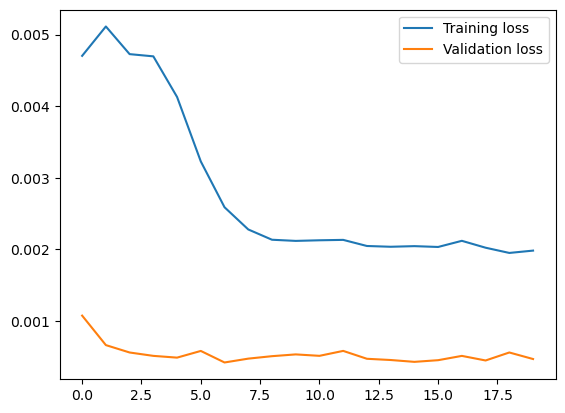

In [164]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [123]:
history.history

{'loss': [0.06036525219678879,
  0.04218392074108124,
  0.03160420432686806,
  0.025003012269735336,
  0.01966356672346592,
  0.015615605749189854,
  0.013411561027169228,
  0.011177385225892067,
  0.009684862568974495,
  0.008652670308947563,
  0.0076477183029055595,
  0.007156455889344215,
  0.006674138363450766,
  0.00632833456620574,
  0.006041232962161303,
  0.005796343553811312,
  0.005445634014904499,
  0.005226022098213434,
  0.005077381618320942,
  0.005080093163996935],
 'accuracy': [0.0028152319137007,
  0.00792710017412901,
  0.010297821834683418,
  0.00963105633854866,
  0.0112609276548028,
  0.00963105633854866,
  0.011705437675118446,
  0.013261224143207073,
  0.013631649315357208,
  0.012298118323087692,
  0.010742331854999065,
  0.01148318313062191,
  0.00963105633854866,
  0.010297821834683418,
  0.011186842806637287,
  0.009482886642217636,
  0.010223736986517906,
  0.008742036297917366,
  0.008742036297917366,
  0.007778930012136698],
 'val_loss': [0.002067175460979

Hacemos las predicciones

In [ ]:
# trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)

In [37]:
X_train.shape

(14998, 3, 6)

In [165]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

180/180 [==============================] - 1s 3ms/step


In [158]:
testPredict[:,5].shape

(5750,)

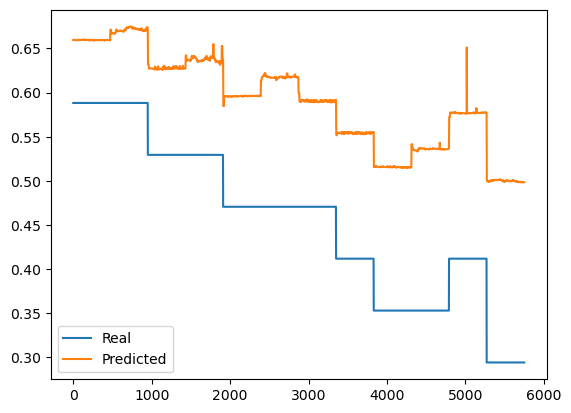

In [168]:
plt.plot(y_test,label='Real')
plt.plot(testPredict[:,5], label='Predicted')
plt.legend()

In [51]:
model.save('Prediciones_1datos.h5')

In [151]:
# Serializa el modelo para JSON
model_JSON = model.to_json()
name_json = "model.json"
with open(name_json, "w") as json_file:
    json_file.write(model_JSON)

# Serializar los pesos (weights) para HDF5
model.save_weights("model.h5")
print("Modelo guardado en el PC")

Modelo guardado en el PC


In [115]:
# Modelo guardado en el PC
from keras.models import model_from_json

name_json = "model.json"

# carga el json y crea el modelo
json_file = open(name_json,'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
# se cargan los pesos (weights) en el nuevo modelo
model = loaded_model.load_weights("model.h5")
print("Modelo cargado desde el PC")
# se evalua el modelo cargado con los datos de los test

FileNotFoundError: [Errno 2] No such file or directory: 'model.json'

In [19]:
loaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4)                 176       
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [53]:
# saving and loading the .h5 model

from keras.models import load_model

# save model
model.save('gfgModel.h5')
print('Model Saved!')
 
# load model
savedModel=load_model('gfgModel.h5')
savedModel.summary()

Model Saved!
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4)                 176       
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [54]:
# saving and loading the model weights
 
# save model
model.save_weights('gfgModelWeights')
print('Model Saved!')
 
# load model
savedModel = model.load_weights('gfgModelWeights')
print('Model Loaded!')

Model Saved!
Model Loaded!


In [56]:
savedModel

In [ ]:
# saving and loading the .h5 model
 
# save model
model.save_weights('gfgModelWeights.h5')
print('Model Saved!')
 
# load model
savedModel = model.load_weights('gfgModelWeights.h5')
print('Model Loaded!')

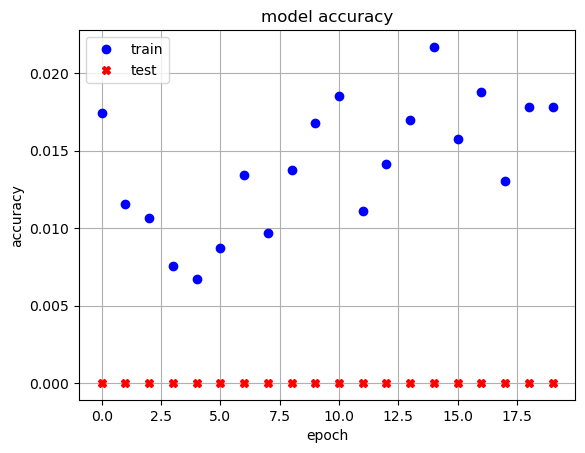

In [169]:
plt.plot(history.history['accuracy'],'bo')
plt.plot(history.history['val_accuracy'],'rX')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()


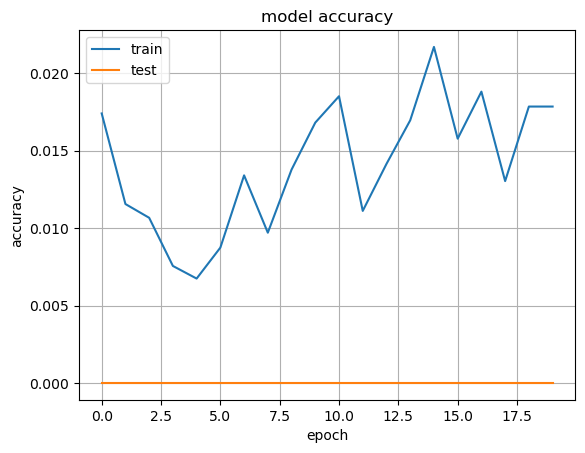

In [170]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()

Invertimos las predicciones

In [129]:
# trainPredict.shape
# trainPredict = model.predict(X_train)
# testPredict = model.predict(X_test)

scaler2 = MinMaxScaler()
scaler2.min_,scaler2.scale_ = scaler.min_[4],scaler.scale_[4]


In [171]:
trainPredict = scaler2.inverse_transform(trainPredict)
trainY = scaler2.inverse_transform([y_train])
testPredict = scaler2.inverse_transform(testPredict)
testY = scaler2.inverse_transform([y_test])

In [65]:
testY.shape

(1, 5750)

In [172]:
testY_1 = numpy.transpose(testY)

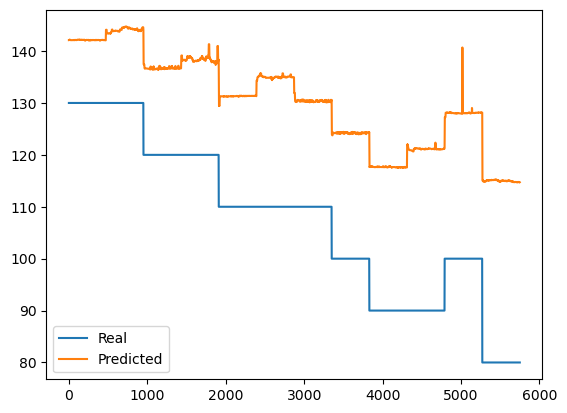

In [173]:
plt.plot(testY_1,label='Real')
plt.plot(testPredict[:,5], label='Predicted')
plt.legend()

In [46]:
testY.shape

(1, 5750)

Calculamos el error rms

In [148]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Resultado del test: %.2f RMSE' % (testScore))

Resultado del entrenamiento: 6.54 RMSE
Resultado del test: 6.76 RMSE


Predicciones del entrenamiento de cambio para plotear

In [48]:
look_back = X_train.shape[1]

In [49]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

Predicciones del test de cambio para plotear

In [56]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

ValueError: could not broadcast input array from shape (5750,1) into shape (5748,6)

Plot baseline and predictions

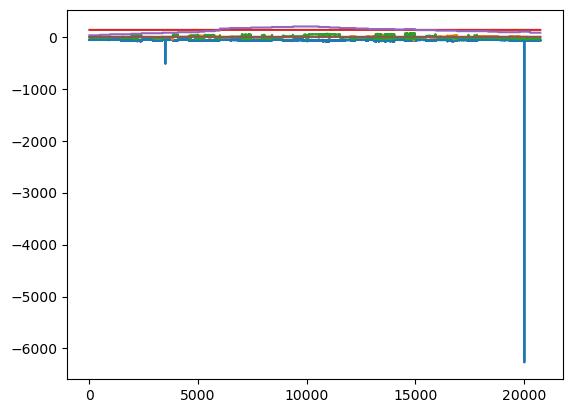

In [51]:
plt.plot(scaler.inverse_transform(dataset))

Ploteamos linea base y predicciones

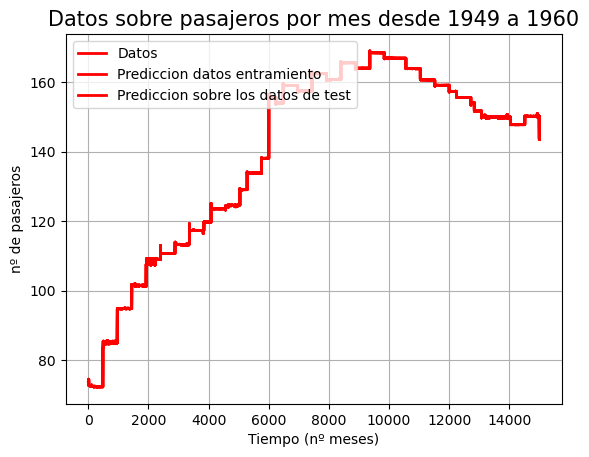

In [52]:
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Datos sobre pasajeros por mes desde 1949 a 1960", fontsize = 15)
plt.xlabel("Tiempo (nº meses)", fontsize = 10)
plt.ylabel("nº de pasajeros", fontsize = 10)
plt.show()